In [1]:
from sklearn.datasets import make_regression
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from ipykernel import kernelapp as app

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# make white noise, n_data = number of data, n_length = length of each data

class White(object):
    """
    make gaussian white noise!!
    n_data = number of data
    n_length = length of each data
    """
    
    def __init__(self, n_data, n_length):
        """
        at self.white timeseriese are in direction of row 
        at self.df_white timesiriese are in column direction
        """
        self.n_data = n_data
        self.n_length = n_length
        self.white = np.random.randn(n_data,n_length)
        self.df_white = pd.DataFrame(self.white.T)
        
    def draw(self):
        """
        draw all serieses
        """
        
        plt.plot(range(1,self.n_length+1), self.white.T)
        plt.show()
        
    def drawthe(self, k):
        """
        draw the kth seriese
        """
        plt.plot(range(self.n_length), self.df_white[k-1])
        plt.show()
        
    def std(self,ensemble=True):
        """
        calculate standard deviation
        if ensemble = true, it calculate ensemble std for white noise// default = true
        if ensemble = False, it calculate each timeseriese`s std
        """
        if ensemble ==True:
            k = 0
        elif ensemble == False:
            k = 1
        else:
            print("error!!")
        return self.white.std(axis=k)

    def std2(self):
        a = np.random.randn(len(self.df_white[0]),len(self.df_white[0]))
        b = self.std()
        for i in range(len(self.df_white[0])):
            for j in range(len(self.df_white[0])):
                a[i][j] = b[i]*b[j]
        return a       
        
    
    def mean(self,ensemble=True):
        """
        calculate mean
        if ensemble = true, it calculate ensemble mean for white noise// default = true
        if ensemble = False, it calculate each timeseriese`s mean
        """
        if ensemble ==True:
            k = 0
        elif ensemble == False:
            k = 1
        else:
            print("error!!")
        return self.white.mean(axis=k)
    
    def cov(self, k, s):
        """
        calculate cov of kth and sth of timeseriese
        """
        return ((self.white[:,k] - self.white[:,k].mean()) * (self.white[:,s] - self.white[:,s].mean())).mean()
    def cov_all(self):
        """
        calculate all covariance and return it as n by n list
        """
        s = pd.DataFrame(self.white - self.white.mean())
        a = np.random.rand(len(self.white[0]),len(self.white[0]))
        for i in range(len(self.white[0])):
            for j in range(len(self.white[0])):
                   a[i][j]=self.cov(i,j)
        return a
   
    def lo(self, k, s):
        """
        calculate cov of kth and sth of timeseriese
        """
        return self.cov(k,s) / self.std()[k] / self.std()[s]
    
    def lo_all(self):
        """
        calculate all lo and return it as n by n list
        """
        a = self.cov_all()/self.std2()
        return a

In [3]:
r = pd.read_csv("CamBay_air_soil_2012-2017.csv")
r.columns =['timestamp', 'Year', 'DOY', 'Month', 'Hour', 'DOYh', 'block',
       'treatment', 'moi', 'soiltemp', 'airtemp', 'rh']
r["year_doy"] = (r.Year.values - 2012) + r.DOYh.values/365

r_c = r[r["treatment"] == "C"]
r_w = r[r["treatment"] == "W"]
r_wp = r[r["treatment"] == "WP"]
r_p = r[r["treatment"] == "P"]



In [4]:
r_c1 = r_c[r_c.block == 1]
r_c2 = r_c[r_c.block == 2]
r_c3 = r_c[r_c.block == 3]
r_c4 = r_c[r_c.block == 4]
r_c5 = r_c[r_c.block == 5]

r_w1 = r_w[r_w.block == 1]
r_w2 = r_w[r_w.block == 2]
r_w3 = r_w[r_w.block == 3]
r_w4 = r_w[r_w.block == 4]
r_w5 = r_w[r_w.block == 5]

r_wp1 = r_wp[r_wp.block ==1]
r_wp2 = r_wp[r_wp.block ==2]
r_wp3 = r_wp[r_wp.block ==3]
r_wp4 = r_wp[r_wp.block ==4]
r_wp5 = r_wp[r_wp.block ==5]

r_p1 = r_p[r_p.block == 1]
r_p2 = r_p[r_p.block == 2]
r_p3 = r_p[r_p.block == 3]
r_p4 = r_p[r_p.block == 4]
r_p5 = r_p[r_p.block == 5]

In [5]:
r

,timestamp,Year,DOY,Month,Hour,DOYh,block,treatment,moi,soiltemp,airtemp,rh,year_doy
0,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,1.0,C,30.48,10.810,10.761,96.556,0.528767
1,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,1.0,P,45.65,11.492,10.712,96.190,0.528767
2,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,1.0,W,47.16,11.977,11.419,93.477,0.528767
3,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,1.0,WP,44.51,12.799,10.761,10.761,0.528767
4,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,2.0,C,NaN,NaN,NaN,NaN,0.528767
5,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,2.0,P,NaN,NaN,NaN,NaN,0.528767
6,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,2.0,W,NaN,NaN,NaN,NaN,0.528767
7,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,2.0,WP,NaN,NaN,NaN,NaN,0.528767
8,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,3.0,C,45.86,11.273,10.663,96.605,0.528767
9,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,3.0,P,46.87,11.370,10.687,96.411,0.528767


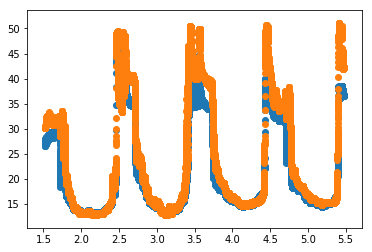

In [6]:
plt.scatter(r_c1.year_doy,r_c2.moi)
plt.scatter(r_p1.year_doy,r_p2.moi)
plt.show()

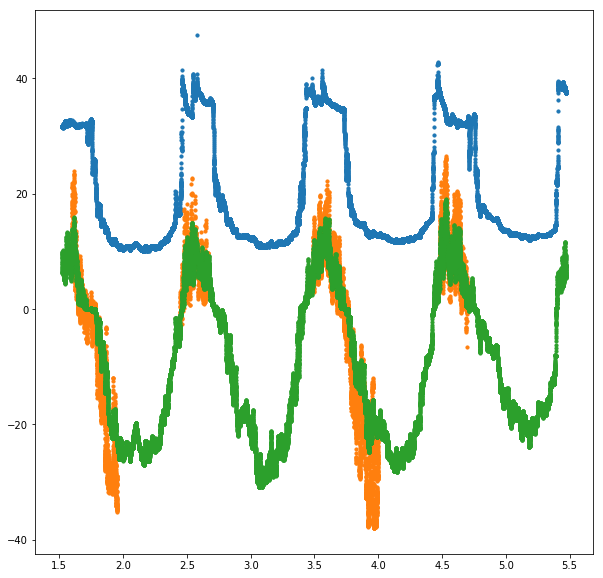

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(r_p1.year_doy,r_p4.moi.values,s=10)
plt.scatter(r_p1.year_doy,r_p4.airtemp,s=10)
plt.scatter(r_p1.year_doy,r_p4.soiltemp,s=10)

plt.show()

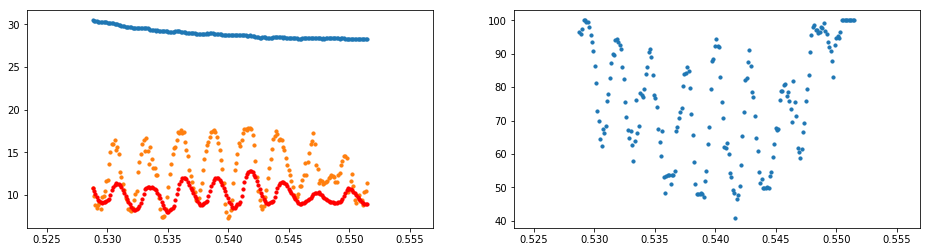

In [8]:
plt.figure(figsize=(16,4))
s=0
e=200
plt.subplot(121)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.airtemp[s:e],s=10)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.soiltemp[s:e],s=10,c="r")
plt.subplot(122)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.rh[s:e],s=10)
plt.show()

In [9]:
r_p1.year_doy.values

array([ 0.52876712,  0.52888128,  0.52899543, ...,  5.47340183,
        5.47351598,  5.47363014])

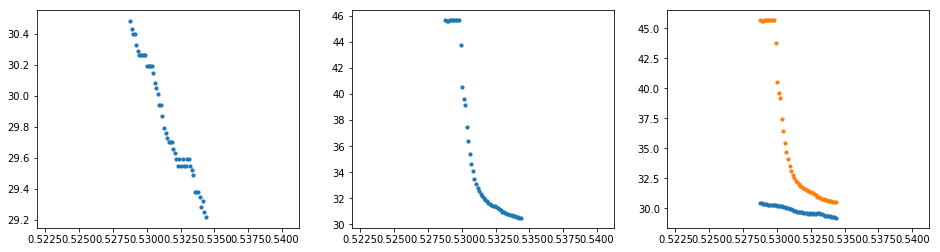

In [10]:
plt.figure(figsize=(16,4))
s=0
e=50
plt.subplot(131)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.subplot(132)
plt.scatter(r_c1.year_doy.values[s:e],r_p1.moi.values[s:e],s=10)
plt.subplot(133)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.scatter(r_c1.year_doy.values[s:e],r_p1.moi.values[s:e],s=10)
plt.show()

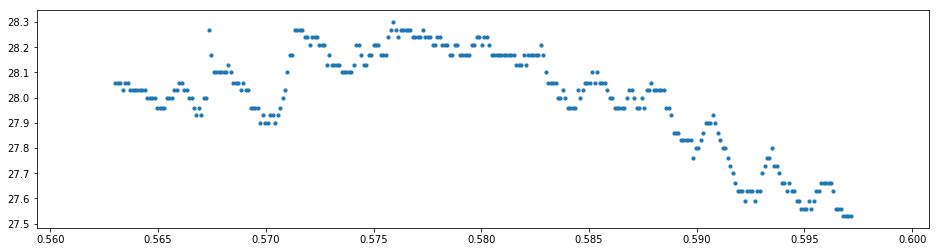

In [11]:
plt.figure(figsize=(16,4))
s=300
e=600
plt.scatter(r_p1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.show()

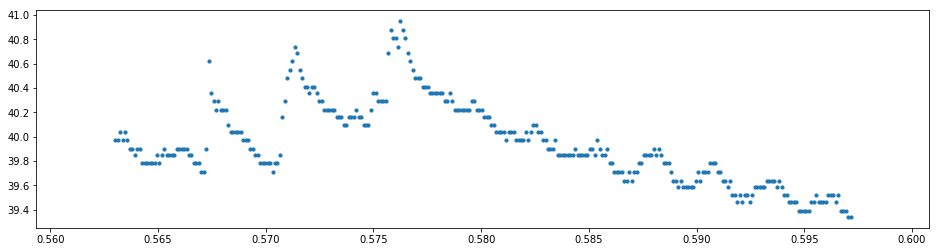

In [12]:
plt.figure(figsize=(16,4))
s=300
e=600
plt.scatter(r_p1.year_doy.values[s:e],r_w1.moi.values[s:e],s=10)
plt.show()

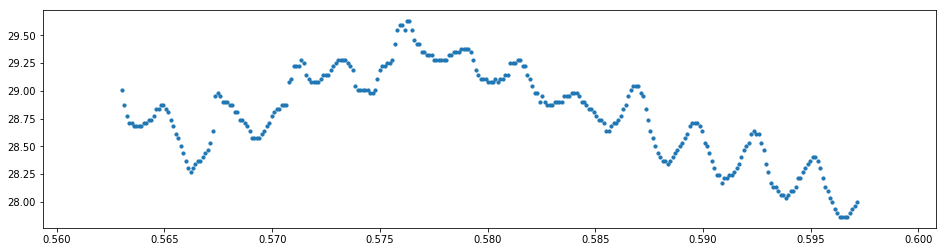

In [91]:
plt.figure(figsize=(16,4))
s=300
e=600
plt.scatter(r_p1.year_doy.values[s:e],r_wp1.moi.values[s:e],s=10)
plt.show()